In [76]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import datetime as dt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis,QuadraticDiscriminantAnalysis
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import preprocessing
from sklearn import model_selection
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import roc_auc_score,r2_score,mean_absolute_error,mean_squared_error,accuracy_score,classification_report,confusion_matrix
from sklearn.model_selection import train_test_split,cross_val_score, cross_val_predict
from sklearn import svm,metrics,tree,preprocessing,linear_model
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier, GradientBoostingRegressor
from sklearn.metrics import accuracy_score,mean_squared_error,recall_score,confusion_matrix,f1_score,roc_curve, auc
from plotly.offline import iplot, init_notebook_mode
import pickle
import warnings
warnings.filterwarnings("ignore")
import datetime as dt
from datetime import datetime
import plotly.express as px

In [77]:

path = '../../../Atliq Marts Challenge'
fact_order_lines_df=pd.read_csv(path+"/fact_order_lines.csv")
# fact_orders_aggregate_df=pd.read_csv("Atliq Marts Challenge/fact_orders_aggregate.csv")

dim_date=pd.read_csv(path+"/dim_date.csv")
dim_customers=pd.read_csv(path+"/dim_customers.csv")
dim_products=pd.read_csv(path+"/dim_products.csv")
dim_targets_orders=pd.read_csv(path+"/dim_targets_orders.csv")



In [78]:
# result =  pd.concat([fact_order_lines_df, fact_orders_aggregate_df], axis=1,join="outer")
# result =pd.merge( fact_order_lines_df, fact_orders_aggregate_df, on=["order_id", "customer_id"])
# esult =pd.merge( fact_order_lines_df, fact_orders_aggregate_df, on=["order_id", "customer_id"])
result =pd.merge( fact_order_lines_df ,dim_customers , how="outer",on=["customer_id"])
result =pd.merge( result ,dim_products , how="outer",on=["product_id"])
train_SC =pd.merge( result ,dim_targets_orders , how="outer",on=["customer_id"])
train_SC =pd.merge( result ,dim_targets_orders , how="outer",on=["customer_id"])

In [79]:
train_SC.columns = [col.lower().replace(' ', '_') for col in train_SC.columns]
train_SC.rename(columns=lambda x: x.replace("(", "").replace(")", ""), inplace=True)
train_SC.rename(columns=lambda x: x.replace("%", "_percent"), inplace=True)

In [80]:
train_SC.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57096 entries, 0 to 57095
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   order_id               57096 non-null  object
 1   order_placement_date   57096 non-null  object
 2   customer_id            57096 non-null  int64 
 3   product_id             57096 non-null  int64 
 4   order_qty              57096 non-null  int64 
 5   agreed_delivery_date   57096 non-null  object
 6   actual_delivery_date   57096 non-null  object
 7   delivery_qty           57096 non-null  int64 
 8   in_full                57096 non-null  int64 
 9   on_time                57096 non-null  int64 
 10  on_time_in_full        57096 non-null  int64 
 11  customer_name          57096 non-null  object
 12  city                   57096 non-null  object
 13  product_name           57096 non-null  object
 14  category               57096 non-null  object
 15  ontime_target_perce

In [81]:
train_SC[train_SC['customer_id'] == 789201].to_csv('output789201.csv', index=False)

In [82]:
selected_rows = train_SC[(train_SC['customer_id'] == 789201) & (train_SC['product_id'] == 25891103)] 

In [83]:
selected_rows.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86 entries, 52360 to 52445
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   order_id               86 non-null     object
 1   order_placement_date   86 non-null     object
 2   customer_id            86 non-null     int64 
 3   product_id             86 non-null     int64 
 4   order_qty              86 non-null     int64 
 5   agreed_delivery_date   86 non-null     object
 6   actual_delivery_date   86 non-null     object
 7   delivery_qty           86 non-null     int64 
 8   in_full                86 non-null     int64 
 9   on_time                86 non-null     int64 
 10  on_time_in_full        86 non-null     int64 
 11  customer_name          86 non-null     object
 12  city                   86 non-null     object
 13  product_name           86 non-null     object
 14  category               86 non-null     object
 15  ontime_target_perc

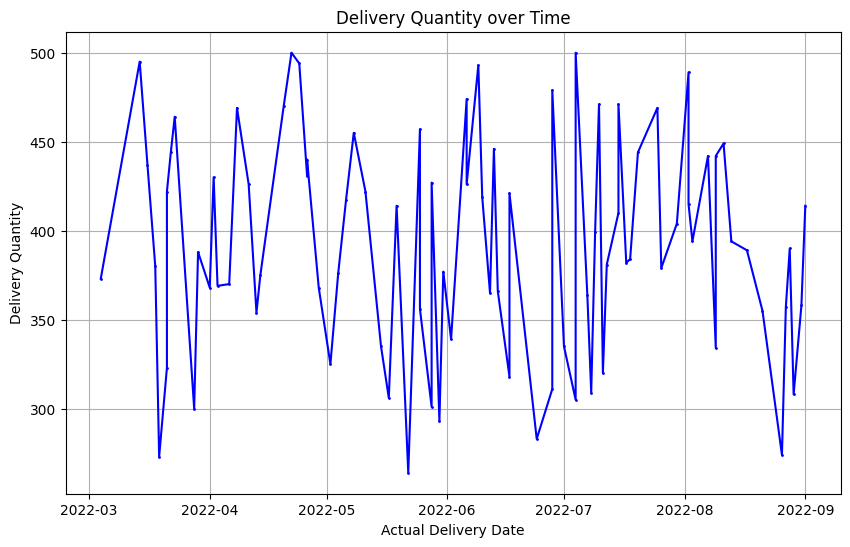

In [84]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming selected_rows is your DataFrame

# Convert 'actual_delivery_date' to datetime format
selected_rows['actual_delivery_date_formatted'] = pd.to_datetime(selected_rows['actual_delivery_date'], format='%d-%b-%y')

# Sort DataFrame by 'actual_delivery_date_formatted'
df_sorted_Predict = selected_rows.sort_values(by='actual_delivery_date_formatted')
df_sorted_Predict.to_csv('output.csv', index=False)
# Plot
plt.figure(figsize=(10, 6))
plt.plot(df_sorted_Predict['actual_delivery_date_formatted'], df_sorted_Predict['delivery_qty'], color='blue', marker='o', linestyle='-', markersize=1)
plt.title('Delivery Quantity over Time')
plt.xlabel('Actual Delivery Date')
plt.ylabel('Delivery Quantity')
plt.grid(True)
plt.show()


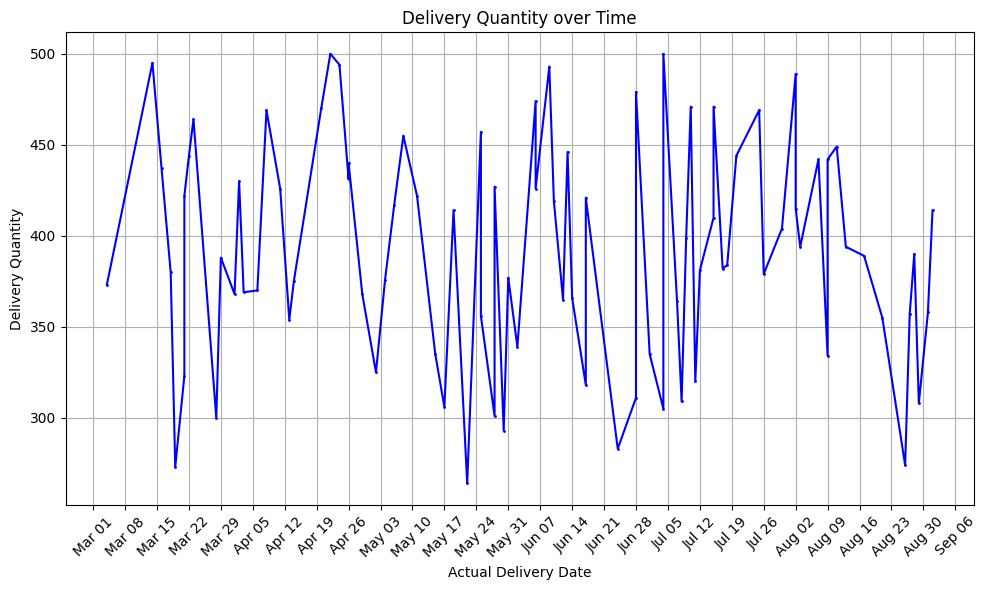

In [85]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Assuming selected_rows is your DataFrame

# Convert 'actual_delivery_date' to datetime format
selected_rows['actual_delivery_date_formatted'] = pd.to_datetime(selected_rows['actual_delivery_date'], format='%d-%b-%y')

# Sort DataFrame by 'actual_delivery_date_formatted'
df_sorted_Predict = selected_rows.sort_values(by='actual_delivery_date_formatted')

# Plot
plt.figure(figsize=(10, 6))
plt.plot(df_sorted_Predict['actual_delivery_date_formatted'], df_sorted_Predict['delivery_qty'], color='blue', marker='o', linestyle='-', markersize=1)
plt.title('Delivery Quantity over Time')
plt.xlabel('Actual Delivery Date')
plt.ylabel('Delivery Quantity')
plt.grid(True)

# Set x-axis major ticks to represent weeks
plt.gca().xaxis.set_major_locator(mdates.WeekdayLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))

plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()
